In this colab I hope to be able to demonstrate accuracy of decision trees vs. a deep learning architecture.  First, I will build a decision tree classifier using libraries including numpy, pandas, matplotlib, and scikit-learn.

My imports for the decision tree classifier are below

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import tree
import os

Mount my drive so I can access data stored in DMP_Classification folder

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Use pandas to read csv file into a dataframe

In [5]:
data_matrix = pd.read_csv('/Users/jackmayr/PycharmProjects/my_juypter_notebooks/csc_395/data/mortality_data.csv')
data_matrix

,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25


Below is a function that takes in a pandas dataframe and filters out rows with instances of missing data or cases of infinity (an all-encompassing filtering function I have used previously when workign with data)

In [6]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float32)

Clean our data

In [7]:
clean_dataset(data_matrix)

/var/folders/78/6y5fpy1j5hlbymrj4fxqkkz40000gn/T/ipykernel_67375/2685958913.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1.0,125047.0,0.0,72.0,1.0,37.588181,0.0,0.0,0.0,1.0,...,138.750000,7.463636,109.166664,13.166667,2.618182,7.230000,21.166666,0.500,40.000000,55.0
2,1.0,109787.0,0.0,83.0,2.0,26.572634,0.0,0.0,0.0,0.0,...,140.714279,8.266666,105.857140,10.000000,2.157143,7.268000,30.571428,0.500,71.500000,35.0
3,1.0,130587.0,0.0,43.0,2.0,83.264626,0.0,0.0,0.0,0.0,...,138.500000,9.476923,92.071426,12.357142,1.942857,7.370000,38.571430,0.600,75.000000,55.0
5,1.0,154653.0,0.0,76.0,1.0,24.262293,1.0,1.0,0.0,0.0,...,136.250000,8.466666,96.750000,13.125000,1.771429,7.310000,30.500000,0.600,65.500000,35.0
6,1.0,194420.0,0.0,72.0,1.0,39.667427,1.0,0.0,0.0,0.0,...,144.133331,8.775000,106.666664,15.200000,1.875000,7.169231,26.799999,0.625,69.769234,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1088,2.0,127201.0,0.0,83.0,1.0,20.347656,1.0,1.0,0.0,0.0,...,137.800003,7.925000,102.400002,16.600000,2.250000,7.273334,23.000000,3.550,48.333332,55.0
1090,2.0,149303.0,0.0,37.0,1.0,26.638050,0.0,0.0,0.0,0.0,...,135.666672,8.400000,100.333336,13.333333,2.050000,7.370000,26.333334,3.775,29.000000,20.0
1091,2.0,130745.0,0.0,61.0,1.0,29.836962,1.0,0.0,0.0,1.0,...,135.444443,8.571428,99.444443,15.888889,1.900000,7.368125,24.333334,4.150,43.000000,20.0
1092,2.0,177737.0,0.0,71.0,2.0,32.804298,1.0,0.0,0.0,1.0,...,141.823532,8.500000,101.470589,12.066667,2.005882,7.385807,32.933334,4.160,42.870968,55.0


One last check to make sure our data is clean

In [8]:
No_NAN = np.any(np.isnan(data_matrix))
No_Inf = np.all(np.isfinite(data_matrix))
if No_NAN == False and No_Inf == True:
  print('test passed')
else:
  print('data not clean')

test passed


Define what columns will be used for features and labels

In [9]:
label_column = data_matrix['outcome']
feature_columns = data_matrix.drop(columns = ['outcome','group','ID'])

create our X, Y train and test sets

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(feature_columns, label_column, random_state = 0)

define our decision tree.  For testing purposes, iterate through various hyperparameter values and create a dataframe for displaying variations in output

In [11]:
hyperparameter_df = pd.DataFrame(columns = ['Critereon', 'Max Depth', 'Min Impurity Decrease', 'Accuracy', 'True Pos', 'True Neg', 'False Pos', 'False Neg'])
index = 0
best_model = ['gini', 2, 0.01]
best_acc = 0
critereon_list = ['gini', 'entropy']
max_depth_list = [2,3,4,5,6,7,8,9,10,11,12]
min_impurity_decrease_list = [0.0001, 0.001, 0.01, 0.02]
for i in range(len(critereon_list)):
  for j in range(len(max_depth_list)):
    for k in range(len(min_impurity_decrease_list)):
      cri = critereon_list[i]
      max_d = max_depth_list[j]
      min_im_dec = min_impurity_decrease_list[k]
      d_tree = DecisionTreeClassifier(criterion=cri, max_depth = max_d, random_state = 0, min_impurity_decrease = min_im_dec)

      d_tree.fit(X_train, Y_train)
      d_tree_predict = d_tree.predict(X_test)
      
      tn, fp, fn, tp = confusion_matrix(Y_test, d_tree_predict).ravel()
      acc = (tp + tn) / (tn + fp + fn + tp)

      if acc > best_acc:
        best_acc = acc
        best_model = [cri, max_d, min_im_dec]
      row = [cri, max_d, min_im_dec, acc, tp, tn, fp, fn]
      hyperparameter_df.loc[index] = row
      index += 1
      



Create a dataframe that shuffles our outcomes and shortens the list for display in portfolio

In [12]:
hyperparameter_df
display_data = hyperparameter_df.sample(frac=1).reset_index(drop=True)
display_data = display_data[:15]
display_data

,Critereon,Max Depth,Min Impurity Decrease,Accuracy,True Pos,True Neg,False Pos,False Neg
0,entropy,10,0.0200,0.850467,2,89,10,6
1,gini,6,0.0100,0.869159,2,91,8,6
2,entropy,5,0.0100,0.897196,2,94,5,6
3,entropy,11,0.0001,0.850467,2,89,10,6
4,gini,11,0.0100,0.869159,2,91,8,6
5,gini,5,0.0200,0.915888,1,97,2,7
6,gini,9,0.0100,0.869159,2,91,8,6
7,entropy,8,0.0200,0.850467,2,89,10,6
8,entropy,9,0.0010,0.850467,2,89,10,6
9,gini,3,0.0001,0.915888,1,97,2,7


Export dataframe for use in portfolio

In [13]:
display_data.to_csv('hyperparameter_mods.csv')
!cp hyperparameter_mods.csv "/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Classification/"


cp: directory /content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Classification does not exist


vizualize tree

In [14]:
print('Best model: Criteria: ', best_model[0], '|  max depth: ', best_model[1],'|  min impurity decrease: ',best_model[2])
d_tree = DecisionTreeClassifier(criterion=best_model[0], max_depth = best_model[1], random_state = 1, min_impurity_decrease = best_model[2])
#d_tree = DecisionTreeClassifier(criterion='gini', max_depth = 2, random_state = 1, min_impurity_decrease = 0.02)
d_tree.fit(X_train, Y_train)


Best model: Criteria:  gini |  max depth:  2 |  min impurity decrease:  0.0001


DecisionTreeClassifier(max_depth=2, min_impurity_decrease=0.0001,
                       random_state=1)

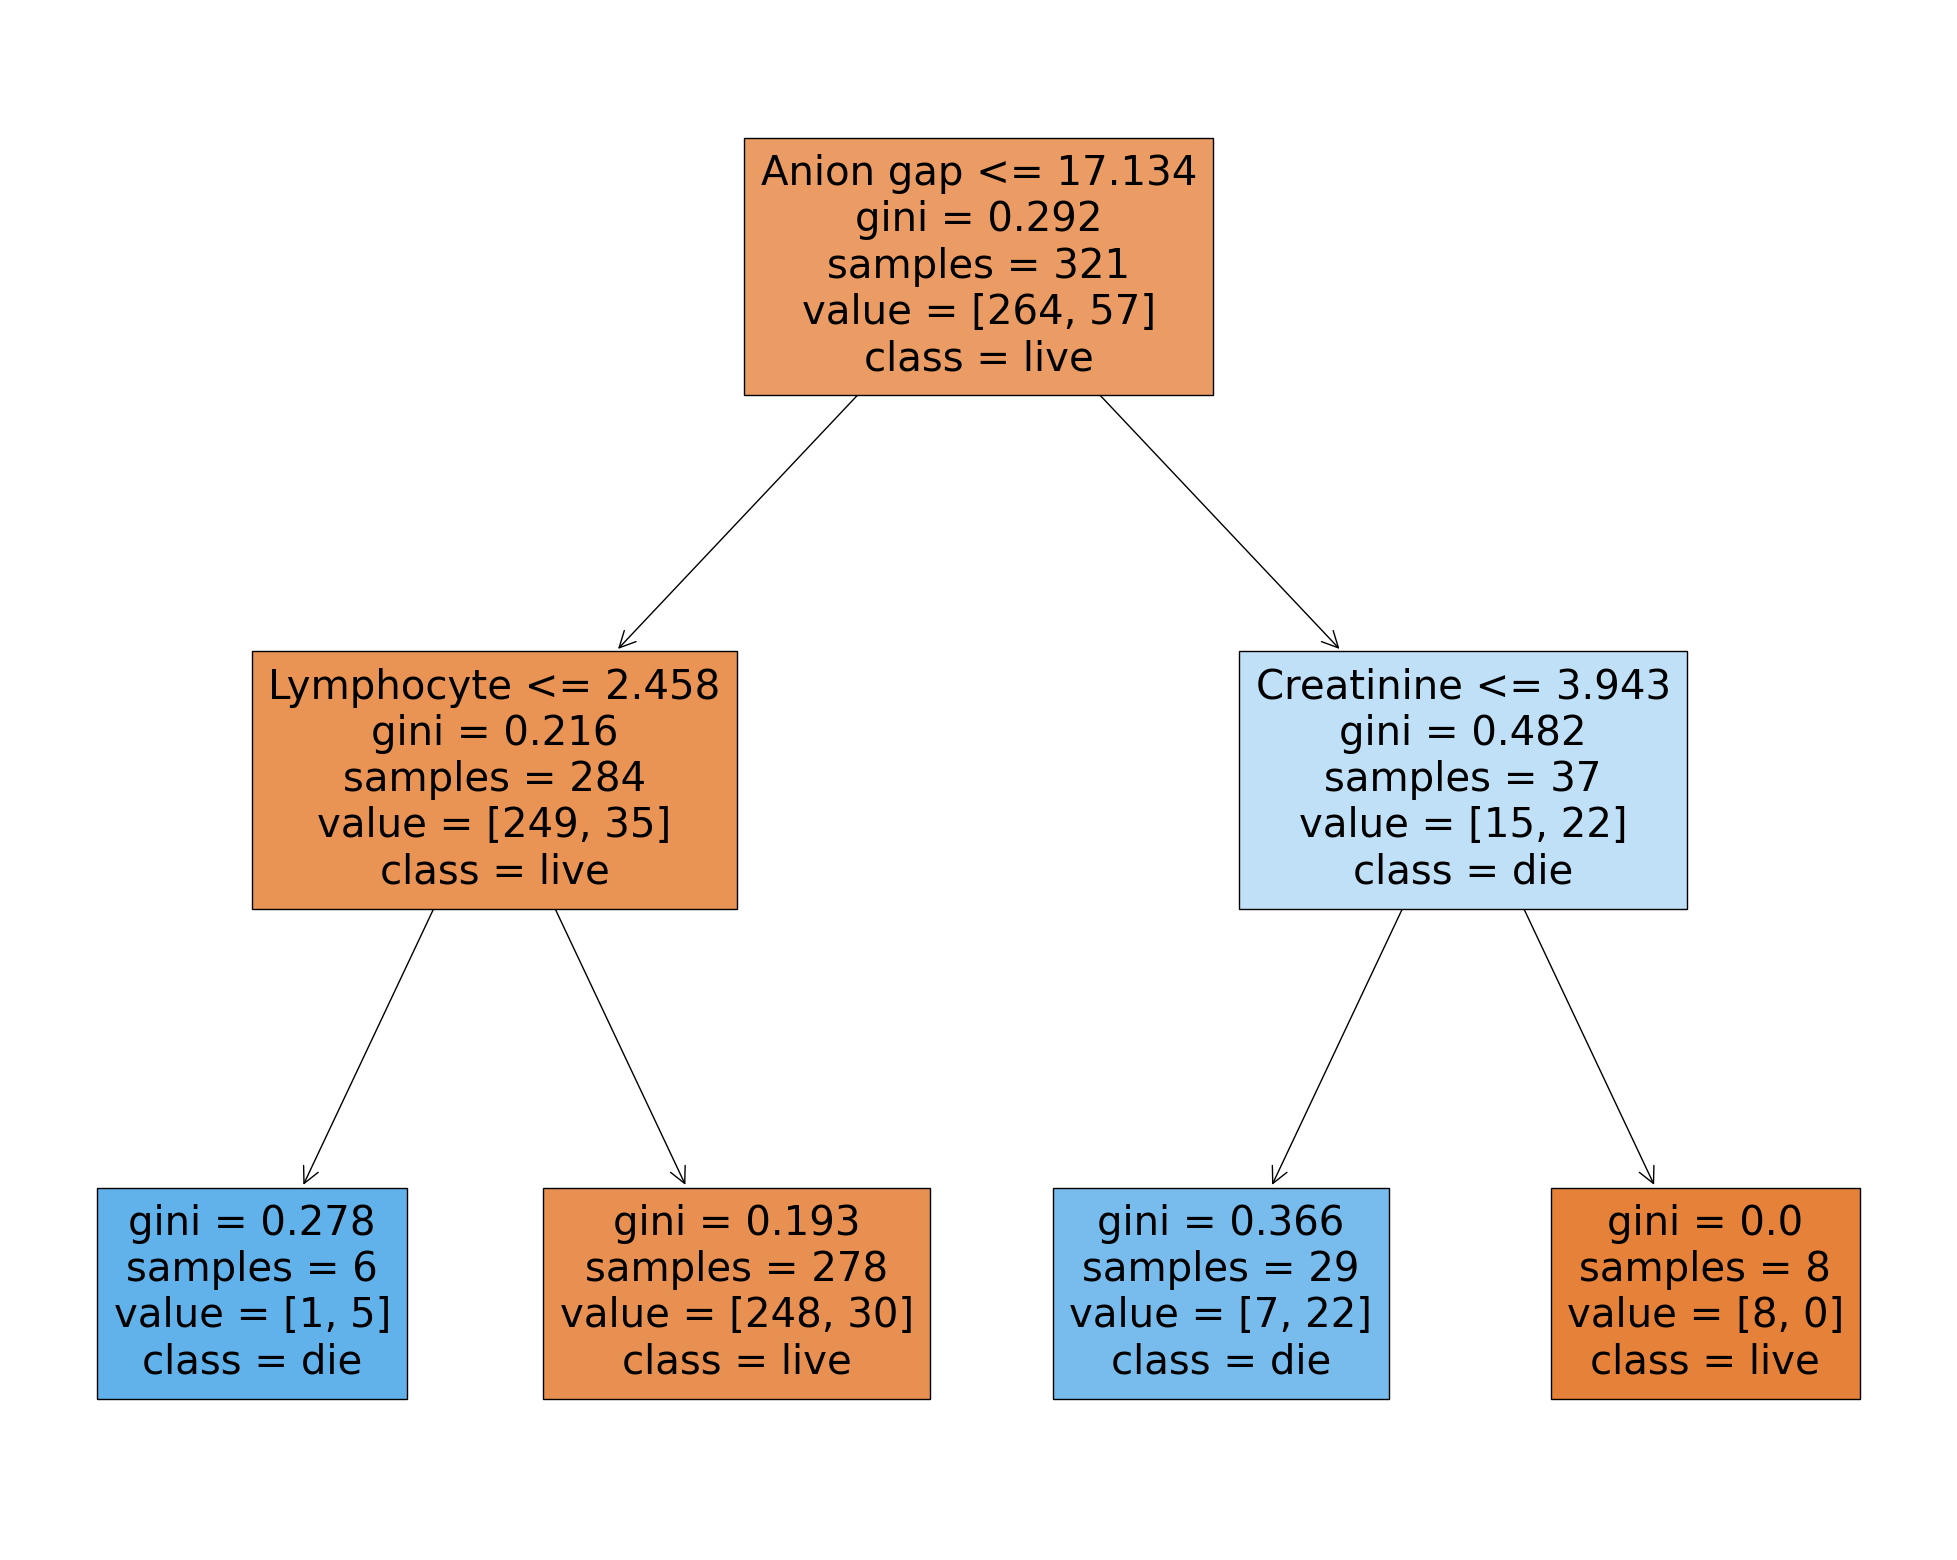

In [15]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(d_tree, 
                   feature_names=feature_columns.columns,  
                   class_names=['live', 'die'],
                   filled=True)



In [16]:
d_tree_predict = d_tree.predict(X_test)
tn, fp, fn, tp = confusion_matrix(Y_test, d_tree_predict).ravel()
acc = (tp + tn) / (tn + fp + fn + tp)
print(acc, best_model[0], best_model[1], best_model[2])

0.9158878504672897 gini 2 0.0001


predict outputs for X_test set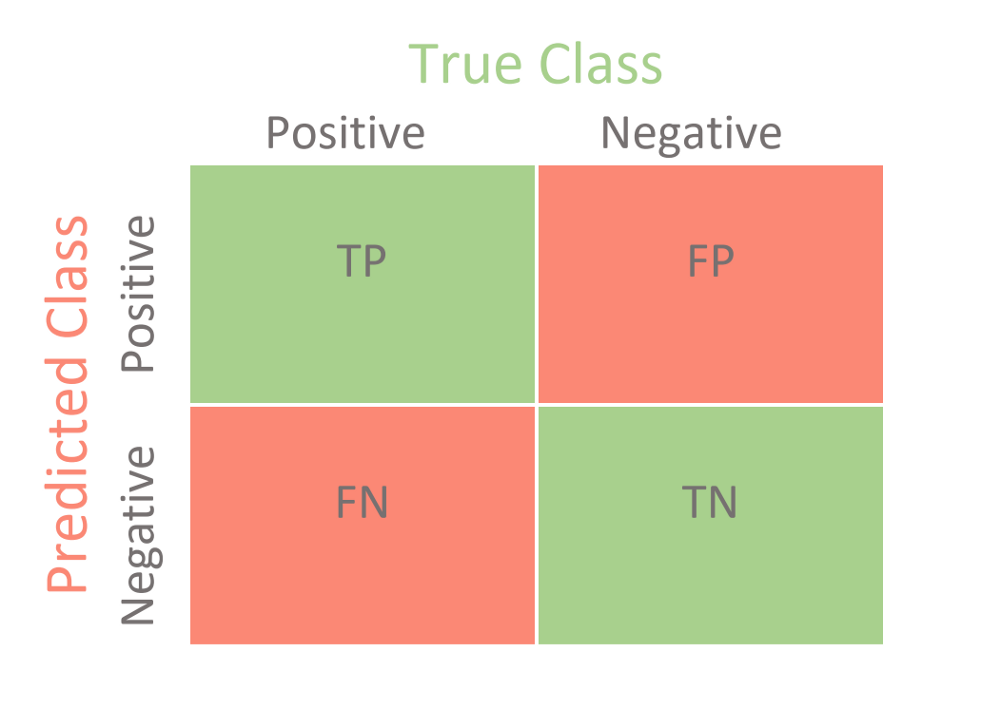

Below I have added a neural network for the purposes of comparison between classification with decision trees and neural networks

In [75]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import preprocessing
from IPython.display import display

normalize the data

In [46]:
normalize = tf.keras.layers.experimental.preprocessing.Normalization()
normalize.adapt(feature_columns)

define our deep learning model

In [47]:
dl_model = tf.keras.Sequential([
                                normalize,
                                tf.keras.layers.Dense(64),
                                tf.keras.layers.Dense(64),
                                tf.keras.layers.Dense(1, activation='relu')])
dl_model.compile(loss = tf.losses.MeanSquaredError(), metrics=['accuracy'],
                      optimizer = tf.optimizers.Adam())

Changing the hyperparameters of dnn

In [48]:
dl_hyperparameter_tuning = pd.DataFrame(columns = ['# dense neurons', 'activation type', 'num epochs', 'Accuracy'])
dense_neurons = [16, 32, 64, 128]
activation_type = ['relu', 'sigmoid', 'linear']
num_epoch = [5, 10, 20, 35, 100]
index = 0
best_dl_model = [16, 'relu', 5]
best_dl_accuracy = 0
for i in range(len(dense_neurons)):
  for j in range(len(activation_type)):
    for k in range(len(num_epoch)):
      dl_model = tf.keras.Sequential([
                                normalize,
                                tf.keras.layers.Dense(dense_neurons[i]),
                                tf.keras.layers.Dense(dense_neurons[i]),
                                tf.keras.layers.Dense(1, activation=activation_type[j])])
      dl_model.compile(loss = tf.losses.MeanSquaredError(), metrics=['accuracy'],
                            optimizer = tf.optimizers.Adam())
      history = dl_model.fit(feature_columns, label_column, epochs=num_epoch[k])
      results = dl_model.evaluate(X_test, Y_test)
      acc = results[1]
      row = [dense_neurons[i], activation_type[j], num_epoch[k], acc]
      dl_hyperparameter_tuning.loc[index] = row
      index += 1
      if acc > best_dl_accuracy:
        best_dl_accuracy = acc
        best_dl_model = [dense_neurons[i], activation_type[j], num_epoch[k]]


Epoch 1/5
14/14 [==============================] - 1s 1ms/step - loss: 0.4728 - accuracy: 0.7220
Epoch 2/5
14/14 [==============================] - 0s 1ms/step - loss: 0.2459 - accuracy: 0.7734
Epoch 3/5
14/14 [==============================] - 0s 2ms/step - loss: 0.1629 - accuracy: 0.8201
Epoch 4/5
14/14 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.8481
Epoch 5/5
4/4 [==============================] - 0s 2ms/step - loss: 0.0709 - accuracy: 0.9159
Epoch 1/10
14/14 [==============================] - 1s 1ms/step - loss: 0.3175 - accuracy: 0.6986
Epoch 2/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.7897
Epoch 3/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.8294
Epoch 4/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.8528
Epoch 5/10
14/14 [==============================] - 0s 2ms/step - loss: 0.1064 - accuracy: 0.8738
Epoch 6/10
14/14 [=========

In [68]:
print(best_dl_model)
print(best_dl_accuracy)

[64, 'sigmoid', 100]
0.9813084006309509


In [76]:
dl_hyperparameter_tuning
dl_display_data = dl_hyperparameter_tuning.sample(frac=1).reset_index(drop=True)
dl_display_data = dl_display_data[:15]
display(dl_display_data)

,# dense neurons,activation type,num epochs,Accuracy
0,128,relu,35,0.962617
1,32,relu,10,0.943925
2,16,sigmoid,35,0.953271
3,128,sigmoid,10,0.962617
4,16,relu,10,0.943925
5,32,sigmoid,20,0.962617
6,32,relu,35,0.943925
7,64,sigmoid,20,0.953271
8,16,relu,35,0.934579
9,16,relu,5,0.915888


In [77]:
# display_data.to_csv('dl_hyperparameter_mods.csv')
# !cp dl_hyperparameter_mods.csv "/content/drive/My Drive/CSC373_DMP_Mayr_Jack/DMP_Classification/"

fitting our model to the data

In [100]:
dl_model_final = tf.keras.Sequential([
                                normalize,
                                tf.keras.layers.Dense(64),
                                tf.keras.layers.Dense(64),
                                tf.keras.layers.Dense(1, activation='sigmoid')])
dl_model_final.compile(loss = tf.losses.MeanSquaredError(), metrics=['accuracy'],
                            optimizer = tf.optimizers.Adam())
history = dl_model_final.fit(feature_columns, label_column, epochs=100)

Epoch 1/100
14/14 [==============================] - 1s 1ms/step - loss: 0.2469 - accuracy: 0.6075
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1749 - accuracy: 0.7453
Epoch 3/100
14/14 [==============================] - 0s 1ms/step - loss: 0.1369 - accuracy: 0.8248
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1156 - accuracy: 0.8785
Epoch 5/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0977 - accuracy: 0.8995
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0882 - accuracy: 0.9019
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9042
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9089
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.8995
Epoch 10/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9065
Epoch 11/

In [143]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
history = dl_model_final.fit(feature_columns, label_column, epochs=100,
          validation_data=(X_test, Y_test),
          callbacks=[cp_callback])  # Pass callback to training

Epoch 1/100
 1/14 [=>............................] - ETA: 0s - loss: 0.0239 - accuracy: 0.9688
Epoch 1: saving model to training_1/cp.ckpt
14/14 [==============================] - 0s 11ms/step - loss: 0.0536 - accuracy: 0.9463 - val_loss: 0.0551 - val_accuracy: 0.9439
Epoch 2/100
 1/14 [=>............................] - ETA: 0s - loss: 2.1375e-04 - accuracy: 1.0000
Epoch 2: saving model to training_1/cp.ckpt
14/14 [==============================] - 0s 6ms/step - loss: 0.0502 - accuracy: 0.9509 - val_loss: 0.0527 - val_accuracy: 0.9439
Epoch 3/100
 1/14 [=>............................] - ETA: 0s - loss: 0.0328 - accuracy: 0.9688
Epoch 3: saving model to training_1/cp.ckpt
14/14 [==============================] - 0s 6ms/step - loss: 0.0494 - accuracy: 0.9509 - val_loss: 0.0500 - val_accuracy: 0.9439
Epoch 4/100
 1/14 [=>............................] - ETA: 0s - loss: 0.0425 - accuracy: 0.9375
Epoch 4: saving model to training_1/cp.ckpt
14/14 [==============================] - 0s 6ms/step

In [144]:
# history = dl_model.fit(feature_columns, label_column, epochs=100)

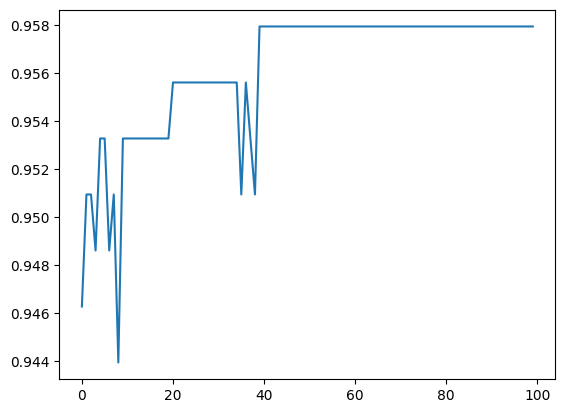

In [145]:
plt.plot(history.history['accuracy'])

In [146]:
results = dl_model_final.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9720


predictions on X_test 

In [147]:
#dl_model_final_pred = dl_model_final.predict(X_test)
print(len(Y_test))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, d_tree_predict)
print(cm)
print('total')
print('True positives: ', cm[0][0])
print('True negatives: ', cm[1][1])
print('False negatives: ', cm[1][0])
print('False positives: ', cm[0][1])



107
[[97  2]
 [ 7  1]]
total
True positives:  97
True negatives:  1
False negatives:  7
False positives:  2


Comparisons in performance between decision tree and neural network

In [148]:
dl_model_final.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = dl_model_final.evaluate(X_test, Y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


4/4 - 0s - loss: 0.0283 - accuracy: 0.9720 - 28ms/epoch - 7ms/step
Restored model, accuracy: 97.20%


In [149]:

print("DL accuracy: ", acc)
print("Evaluate decision tree model on test data")
DT_results = d_tree.score(X_test, Y_test)
print("test loss, test acc:", DT_results)
#dl_model.predict(X_test)

DL accuracy:  0.9719626307487488
Evaluate decision tree model on test data
test loss, test acc: 0.9158878504672897
